In [1]:
import pandas as pd
import nltk
import unicodedata
import re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Load DataFrame
df = pd.read_csv("../data/pdf_metadata_and_summaries.csv")  # Replace with your actual filename

In [4]:
df.columns

Index(['File Name', 'Metadata', 'Summary'], dtype='object')

In [5]:
ADDITIONAL_STOPWORDS = ['bank']

def clean(sentence):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    sentence = (unicodedata.normalize('NFKD', sentence)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    
    # Remove numbers, punctuations, and any word with a single letter
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)  # Keep only alphabetic characters and spaces
    words = sentence.split()
    
    # Lemmatize and filter out stopwords and single-letter words
    word_list = [wnl.lemmatize(word) for word in words if len(word) > 1 and word not in stopwords]
    
    return word_list

def get_words(df, column):
    """
    Takes a dataframe and a column and returns a list of
    cleaned words that is returned by clean().

            Parameters:
                    df (dataframe): A pandas dataframe
                    column (series): A pandas series

            Returns:
                    word_list (list): A list of cleaned words
    """
    return clean(''.join(str(df[column].tolist())))

In [6]:
all_words = get_words(df, 'Summary')

In [7]:
word_counts = Counter(all_words)

In [8]:
top_words = word_counts.most_common(25)

In [9]:
type(top_words)

list

In [10]:
df_topwords = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

In [11]:
df_topwords

,Word,Frequency
0,loan,12415
1,fdic,8702
2,examination,7389
3,management,7344
4,institution,7186
5,bank,7071
6,risk,6951
7,report,5661
8,capital,5550
9,loss,4887


In [12]:
def get_unigrams(words):
    """
    Takes in a list of words and returns a series of
    unigrams with value counts.
    """
    return  pd.Series(words).value_counts()[:25]

def get_bigrams(words):
    """
    Takes in a list of words and returns a series of
    bigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

def get_trigrams(words):
    """
    Takes in a list of words and returns a series of
    trigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(words, 3)).value_counts())[:25]

def get_qualgrams(words):
    """
    Takes in a list of words and returns a series of
    qualgrams with value counts.
    """
    return (pd.Series(nltk.ngrams(words, 4)).value_counts())[:25]

In [13]:
def viz_unigrams(df, column, title):
    """
    Takes in a dataframe, target column name, and specified title
    for the bar chart visualization of bigrams.
    """
    get_unigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Unigram')
    plt.xlabel('# of Occurances')
    
def viz_bigrams(df, column, title):
    """
    Takes in a dataframe, target column name, and specified title
    for the bar chart visualization of bigrams.
    """
    get_bigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Bigram')
    plt.xlabel('# of Occurances')

def viz_trigrams(df, column, title):
    """
    Takes in a dataframe, target column name, and specified title
    for the bar chart visualization of trigrams.
    """
    get_trigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Trigram')
    plt.xlabel('# of Occurances')
    
def viz_qualgrams(df, column, title):
    """
    Takes in a dataframe, target column name, and specified title
    for the bar chart visualization of qualgrams.
    """
    get_qualgrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Qualgram')
    plt.xlabel('# of Occurances')

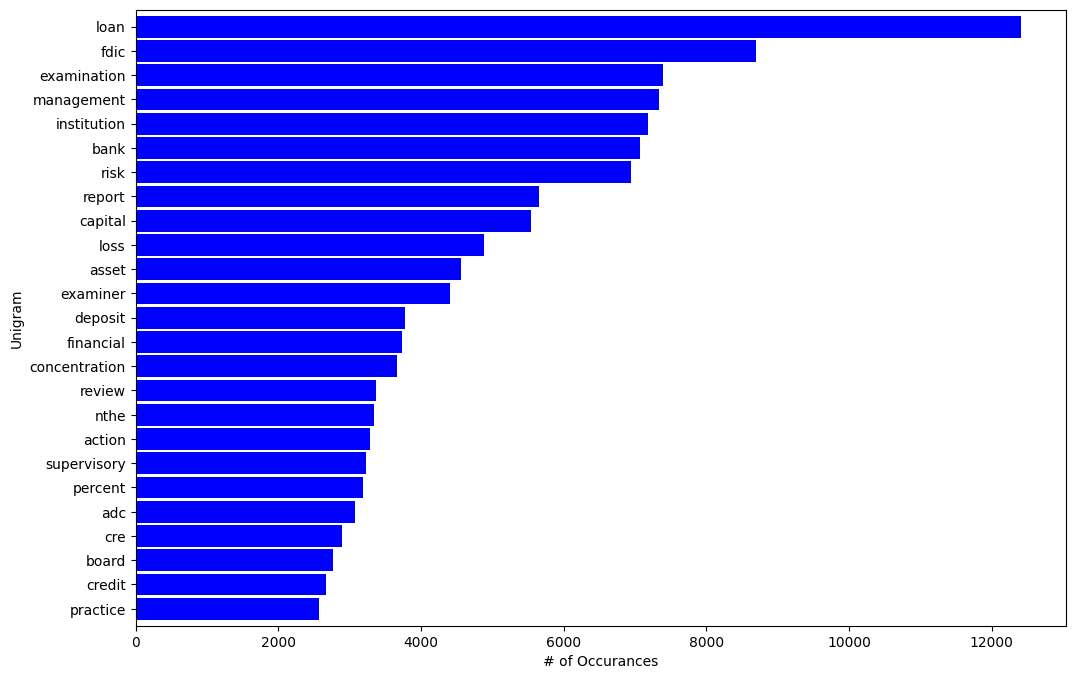

In [14]:
viz_unigrams(df, "Summary", "")

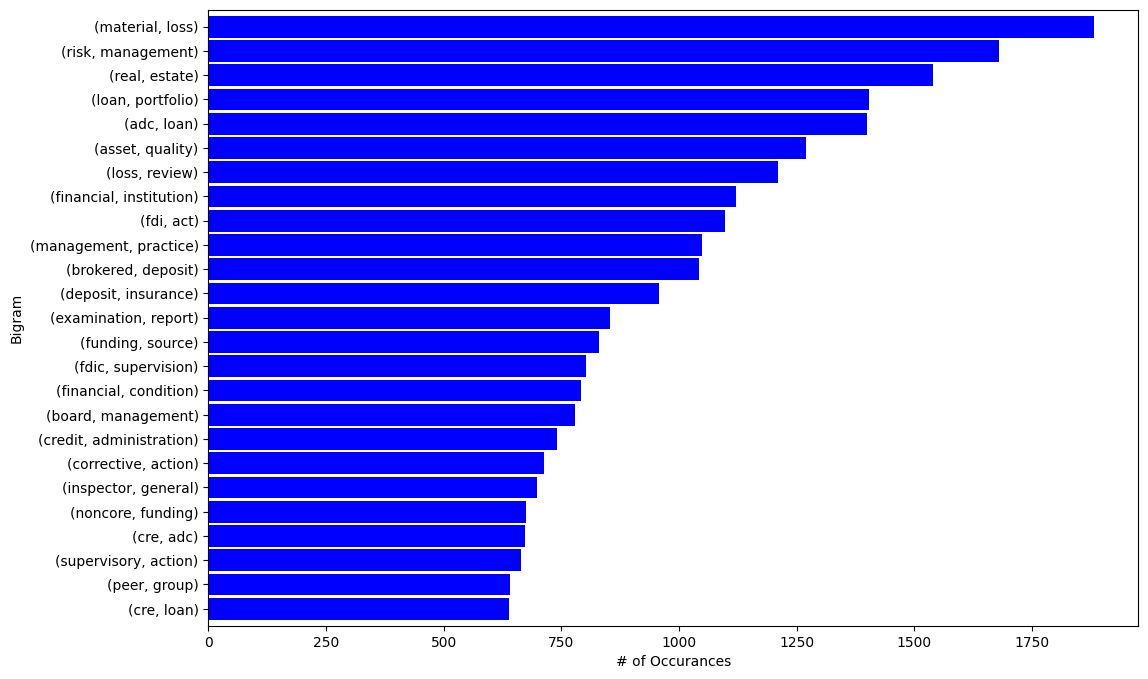

In [15]:
viz_bigrams(df, "Summary", "")

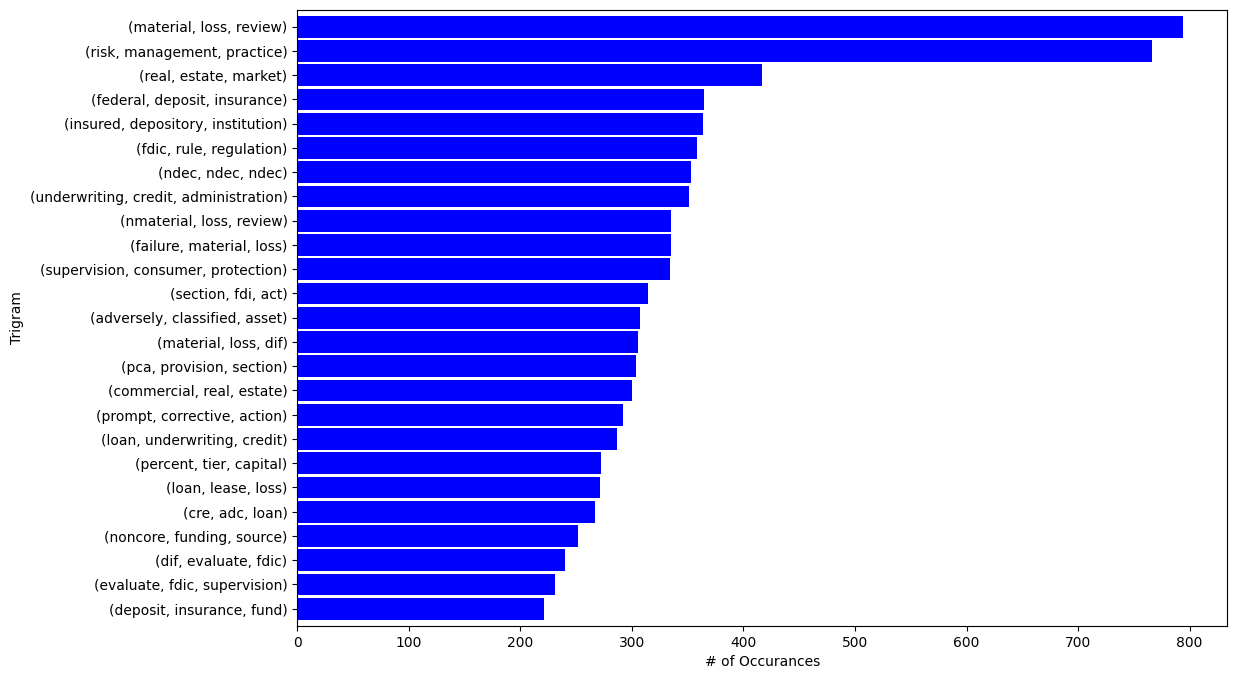

In [16]:
viz_trigrams(df, "Summary", "")

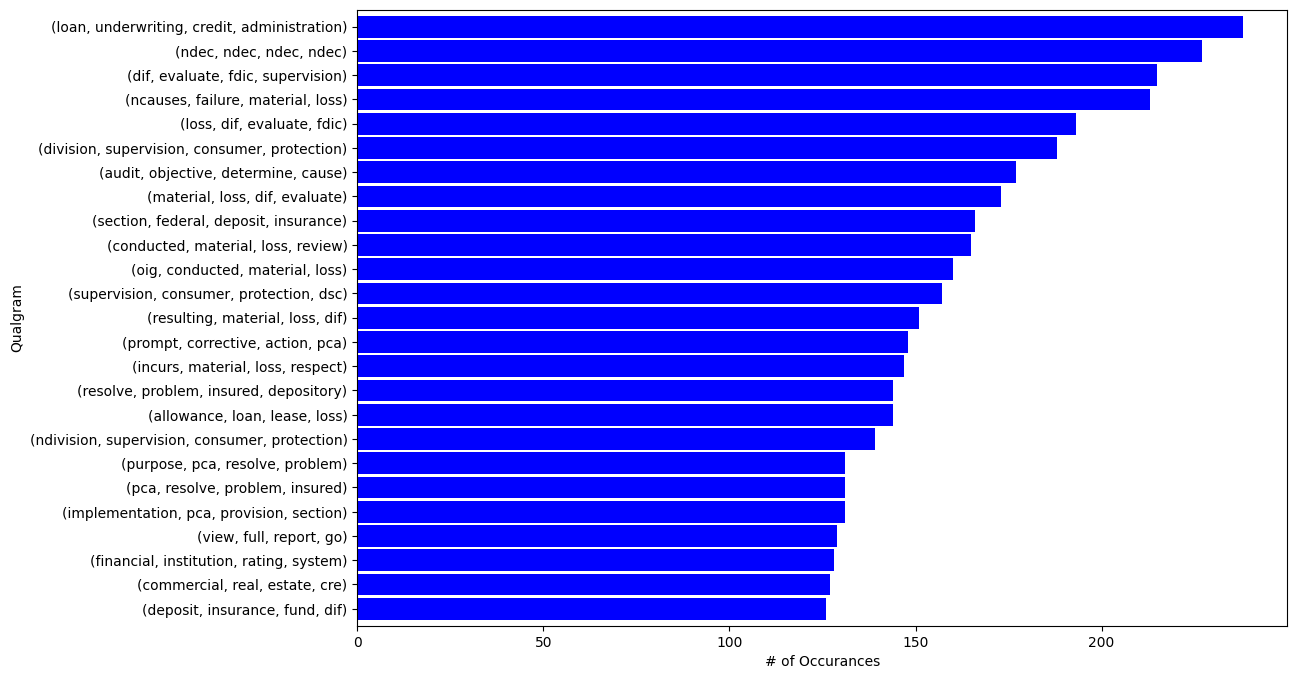

In [17]:
viz_qualgrams(df, "Summary", "")